Feature ranking:
1. feature section_names_header (0.013323)
2. feature ent_q_diffs_var (0.011082)
3. feature ent_p_8 (0.007984)
4. feature ent_q_diff_diffs_2_min (0.007330)
5. feature dc_por (0.006090)
6. feature Img4 (0.006081)
7. feature ent_q_diffs_0 (0.006035)
8. feature GetEnvironmentStrings (0.005756)
9. feature IsValidCodePage (0.005639)
10. feature .text_por (0.005215)
11. feature Img33 (0.005110)
12. feature Img7 (0.004972)
13. feature ent_q_diff_diffs_2_mean (0.004957)
14. feature Img43 (0.004863)
15. feature ent_q_diff_diffs_10 (0.004795)
16. feature ent_q_diff_diffs_2_median (0.004790)
17. feature FreeEnvironmentStringsW (0.004652)
18. feature __p__fmode (0.004624)
19. feature ent_p_18 (0.004617)
20. feature db3_rdata (0.004600)
21. feature ent_p_10 (0.004565)
22. feature ent_p_19 (0.004498)
23. feature _XcptFilter (0.004441)
24. feature ent_q_diff_block_0_19 (0.004366)
25. feature Img50 (0.004357)
26. feature Img41 (0.004343)
27. feature Img34 (0.004169)
28. feature ent_p_

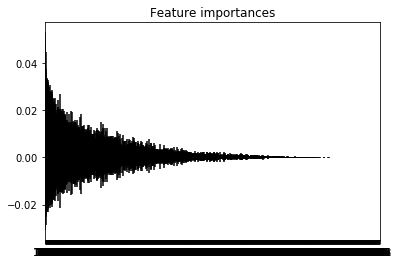

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

dataset = np.loadtxt('Dataset.csv', delimiter=",")
attr = np.genfromtxt('Attribute.csv',dtype='str',delimiter=",")

# separate the data from the target attributes
X = dataset[:,1:]
y = dataset[:,0]

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, attr[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()